<a href="https://colab.research.google.com/github/DRepresser/NeuroClassify/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## setup colab

In [1]:
pip install -q biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from Bio import SeqIO
import pandas as pd
import os

## prepare data

In [ ]:
positive_directory = "/content/drive/MyDrive/ESM/data_raw/Positive/"
positive_files = [positive_directory + f for f in os.listdir(positive_directory)]
positive_files

['/content/drive/MyDrive/ESM/data_raw/Positive/PLM_Test_pos.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/PLM_Train_pos.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/neuropeptide_excel_NeuroPepV2_neuropeptide.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/NeuroPedia_identical.txt',
 '/content/drive/MyDrive/ESM/data_raw/Positive/NeuroPedia_overlapping.txt',
 '/content/drive/MyDrive/ESM/data_raw/Positive/NeuroPedia_homolog.txt',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_rat.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_human.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_mouse.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_bovine.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_rhesusmacaque.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_chimpanzee.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Positive/Neuropeptides_californiaseahare.fa

In [ ]:
negative_directory = "/content/drive/MyDrive/ESM/data_raw/Negative/"
negative_files = [negative_directory + f for f in os.listdir(negative_directory)]
negative_files

['/content/drive/MyDrive/ESM/data_raw/Negative/PLM_Test_neg.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Negative/PLM_Train_neg.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Negative/Nemato_ENPG_GlAm_pQE_XP_XXP_DECOY.fasta',
 '/content/drive/MyDrive/ESM/data_raw/Negative/Nemato_ENPG_KxK_only_DECOY.fasta']

In [ ]:
labeled_files = [
    '/content/drive/MyDrive/ESM/data_raw/test.csv',
    '/content/drive/MyDrive/ESM/data_raw/train.csv'
]

In [ ]:
def read_files(file_list, labeled_files, label):
    """
    Reads multiple .fasta, .txt, and .xls files and extracts sequences into a DataFrame.

    Args:
        file_list (list): List of file paths.

    Returns:
        pd.DataFrame: DataFrame containing unique sequences in a 'sequence' column.
    """

    sequences = []

    for file_path in file_list:
        if file_path.endswith('.fasta'):
            for record in SeqIO.parse(file_path, "fasta"):
                sequences.append({"sequence": str(record.seq)})
        elif file_path.endswith('.txt'):
            with open(file_path, 'r') as f:
                for line in f:
                    line = line.strip()
                    if line:
                        columns = line.split("\t")
                        if columns[0] != "Amino acid Sequence":
                            sequences.append({"sequence": str(columns[0])})
        elif file_path.endswith('.xls'):
            data = pd.read_excel(file_path, header=1, engine='xlrd')
            if 'Amino acid Sequence' in data.columns:
                amino_acid_sequences = data['Amino acid Sequence'].dropna().tolist()
                for seq in amino_acid_sequences:
                        sequences.append({"sequence": seq})

    for labeled_file in labeled_files:
        labeled_data = pd.read_csv(labeled_file)
        labeled_sequences = labeled_data[labeled_data['label'] == label]['seq'].dropna().tolist()
        for seq in labeled_sequences:
            sequences.append({"sequence": seq})

    df = pd.DataFrame(sequences)
    return df.drop_duplicates(subset='sequence').reset_index(drop=True)

In [ ]:
def clean_sequences(df):
    """
    Clean peptide sequences by removing stop codons (*) and ensuring proper format.

    Args:
        df (pd.DataFrame): DataFrame containing peptide sequences in a 'sequence' column.

    Returns:
        pd.DataFrame: Cleaned DataFrame with only valid peptide sequences.
    """
    df['sequence'] = df['sequence'].str.replace(r'\*', '', regex=True)
    df['sequence'] = df['sequence'].str.replace(r'[^A-Z]', '', regex=True)
    df['sequence'] = df['sequence'].str.upper()
    df = df.drop_duplicates(subset='sequence').reset_index(drop=True)
    return df

In [ ]:
positive_df = read_files(positive_files, labeled_files, label=1)
positive_df = clean_sequences(positive_df)
positive_df

,sequence
0,IGLRLPNMLKF
1,LRSPKMMHKSGCFGRRLDRIGSLSGLGCNVLRKY
2,SADYLDVSQ
3,HPVVQSAEMSFGRPVVVEEEQALNPEELSFSEQAYLSHDAAGFGYP...
4,GLYSSERTEEEVEISHGMHHRE
...,...
3063290,GYKDKEKEEKVNICKLYRGLPII
3063291,AYSTTT
3063292,YRAYSTTT
3063293,SWYRAPPRGRRYRAYSTTT


In [ ]:
negative_df = read_files(negative_files, labeled_files, label=0)
negative_df = clean_sequences(negative_df)
negative_df

,sequence
0,MSGSVCCACDTRFFRAQWVDCGFGGSSSVVVGASPQGLLRVR
1,RTQPTSAARPCRRVERD
2,APMMIRFVDDCPGIRD
3,MSEVAEKVKKIVVEHLGVDEAKVTPEASFIDDLGADSLDTVELVMA...
4,QAAQFKVWSASELVD
...,...
11140486,CDTVSVAKFC
11140487,AFCSECGEQVCRNKHIDGKCDTVSVAKFC
11140488,NTFMYYAPNNRVVFIEEFILI
11140489,GGLVCKNTFMYYAPNNRVVFIEEFILI


In [ ]:
len(positive_df)-len(negative_df)

-8077196

In [ ]:
output_path = "/content/drive/MyDrive/ESM/data_clean/"
positive_df.to_csv(output_path + "positive_sequences.csv", index=False)
negative_df.to_csv(output_path + "negative_sequences.csv", index=False)

## plot

In [4]:
data_path = "/content/drive/MyDrive/ESM/data_clean/"
positive_df = pd.read_csv(data_path + "positive_sequences.csv")
negative_df = pd.read_csv(data_path + "negative_sequences.csv")

In [7]:
positive_df['label'] = 1
negative_df['label'] = 0

In [8]:
df = pd.concat([positive_df, negative_df], ignore_index=True)
df

,sequence,label
0,IGLRLPNMLKF,1
1,LRSPKMMHKSGCFGRRLDRIGSLSGLGCNVLRKY,1
2,SADYLDVSQ,1
3,HPVVQSAEMSFGRPVVVEEEQALNPEELSFSEQAYLSHDAAGFGYP...,1
4,GLYSSERTEEEVEISHGMHHRE,1
...,...,...
14203781,CDTVSVAKFC,0
14203782,AFCSECGEQVCRNKHIDGKCDTVSVAKFC,0
14203783,NTFMYYAPNNRVVFIEEFILI,0
14203784,GGLVCKNTFMYYAPNNRVVFIEEFILI,0


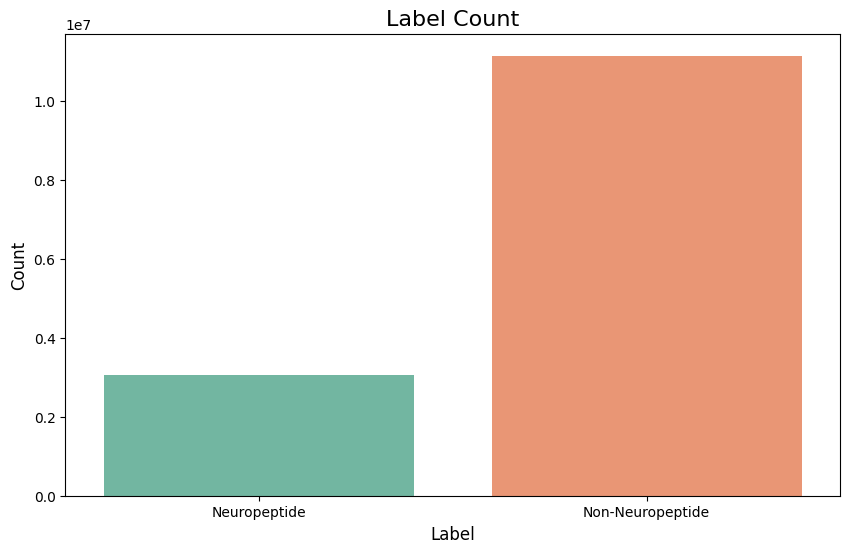

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df['label'] = df['label'].map({0: 'Non-Neuropeptide', 1: 'Neuropeptide'})

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, hue='label', palette='Set2')
plt.title("Label Count", fontsize=16)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## generate random sequence if negative < positive

In [ ]:
def generate_random_sequence(length):
    """
    Generate a random amino acid sequence of a given length.

    Args:
        length (int): Length of the sequence.

    Returns:
        str: Random amino acid sequence.
    """
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'  # Standard amino acids
    return ''.join(random.choices(amino_acids, k=length))

In [ ]:
def generate_negative_sequences(positive_df, existing_negative_df, num_sequences):
    """
    Generates random negative sequences that are not in the positive dataset
    and are unique within the negative dataset.

    Args:
        positive_df (pd.DataFrame): DataFrame containing positive sequences.
        existing_negative_df (pd.DataFrame): DataFrame containing existing negative sequences.
        num_sequences (int): Number of random negative sequences to generate.

    Returns:
        pd.DataFrame: DataFrame containing unique negative sequences.
    """
    positive_set = set(positive_df['sequence'])
    negative_set = set(existing_negative_df['sequence']) if not existing_negative_df.empty else set()

    all_existing_sequences = positive_set.union(negative_set)
    generated_sequences = set()

    while len(generated_sequences) < num_sequences:
        random_length = random.randint(5, 50)  # Random sequence length between 5 and 50
        sequence = generate_random_sequence(random_length)
        if sequence not in all_existing_sequences and sequence not in generated_sequences:
            generated_sequences.add(sequence)

    new_negative_df = pd.DataFrame({"sequence": list(generated_sequences), "label": 0})
    return new_negative_df.reset_index(drop=True)

In [ ]:
new_negative_df = generate_negative_sequences(positive_df, negative_df, num_sequences=(len(positive_df)-len(negative_df)))
final_negative_df = pd.concat([negative_df, new_negative_df], ignore_index=True)
final_negative_df